<a href="https://colab.research.google.com/github/Artorius81/labs_ml_basov/blob/main/labs/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4_%D0%91%D0%B0%D1%81%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [ ]:
!pip install detectorusoutlierus

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

from detectorusoutlierus import outliers as do

In [ ]:
df = pd.read_csv('/content/CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

'\nПредварительно - оптимизируйте ваш набор данных.\n1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)\n2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)\n3. Скопируйте df в df_cluster # df_cluster = df.copy()\nдалее вы работаете с ним\n4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные\n5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки\n'

In [ ]:
# your_code here

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

MINIMUM_PAYMENTS содержит 313 пропусков.

Также удаляем столбец с CUST_ID

In [ ]:
df = df.drop(['CUST_ID', 'MINIMUM_PAYMENTS'], axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,0.250000,6


In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df_cluster = df.copy()

In [ ]:
df_cluster[["BALANCE","PAYMENTS", 'CREDIT_LIMIT']]

,BALANCE,PAYMENTS,CREDIT_LIMIT
0,40.900749,201.802084,1000.0
1,3202.467416,4103.032597,7000.0
2,2495.148862,622.066742,7500.0
3,1666.670542,0.000000,7500.0
4,817.714335,678.334763,1200.0
...,...,...,...
8945,28.493517,325.594462,1000.0
8946,19.183215,275.861322,1000.0
8947,23.398673,81.270775,1000.0
8948,13.457564,52.549959,500.0


<Axes: >

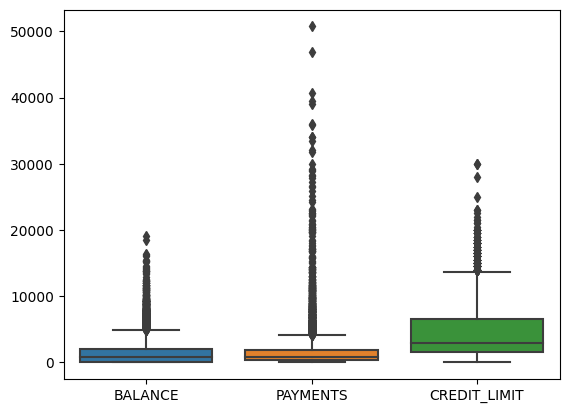

In [ ]:
sns.boxplot(df_cluster[["BALANCE","PAYMENTS", 'CREDIT_LIMIT']])

In [ ]:
outlier_detector = do.Outline(df_cluster)
outliers_kvart = outlier_detector.detect_outlier_mean_std('BALANCE')
df_cluster = pd.concat([df_cluster,outliers_kvart,outliers_kvart]).drop_duplicates(keep=False)
# df_cluster = pd.concat([df_cluster, outliers_kvart, outliers_kvart]).drop_duplicates(keep=False)
df_cluster[['BALANCE', 'PAYMENTS']]

,BALANCE,PAYMENTS
0,40.900749,201.802084
2,2495.148862,622.066742
3,1666.670542,0.000000
4,817.714335,678.334763
5,1809.828751,1400.057770
...,...,...
8945,28.493517,325.594462
8946,19.183215,275.861322
8947,23.398673,81.270775
8948,13.457564,52.549959


In [ ]:
outlier_detector = do.Outline(df_cluster)
outliers_kvart = outlier_detector.detect_outlier_mean_std('PAYMENTS')
df_cluster = pd.concat([df_cluster, outliers_kvart, outliers_kvart]).drop_duplicates(keep=False)
df_cluster[['BALANCE', 'PAYMENTS']]

,BALANCE,PAYMENTS
0,40.900749,201.802084
4,817.714335,678.334763
7,1823.652743,679.065082
10,1293.124939,1083.301007
11,630.794744,705.618627
...,...,...
8945,28.493517,325.594462
8946,19.183215,275.861322
8947,23.398673,81.270775
8948,13.457564,52.549959


In [ ]:
outlier_detector = do.Outline(df_cluster)
outliers_kvart = outlier_detector.detect_outlier_mean_std('CREDIT_LIMIT')
df_cluster = pd.concat([df_cluster, outliers_kvart, outliers_kvart]).drop_duplicates(keep=False)
df_cluster[['BALANCE', 'PAYMENTS', 'CREDIT_LIMIT']]

,BALANCE,PAYMENTS,CREDIT_LIMIT
0,40.900749,201.802084,1000.0
4,817.714335,678.334763,1200.0
5,1809.828751,1400.057770,1800.0
7,1823.652743,679.065082,2300.0
10,1293.124939,1083.301007,1200.0
...,...,...,...
8945,28.493517,325.594462,1000.0
8946,19.183215,275.861322,1000.0
8947,23.398673,81.270775,1000.0
8948,13.457564,52.549959,500.0


<Axes: >

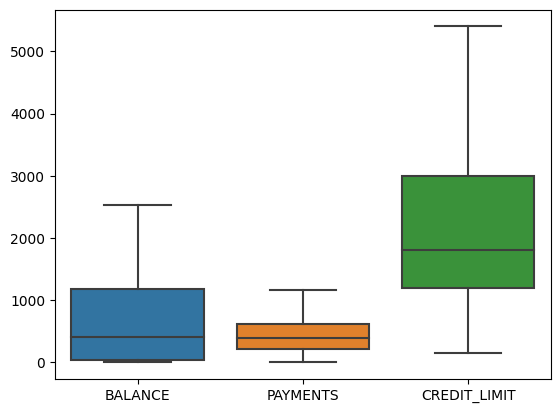

In [ ]:
sns.boxplot(df_cluster[["BALANCE","PAYMENTS", 'CREDIT_LIMIT']])

In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4018 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4018 non-null   float64
 1   BALANCE_FREQUENCY                 4018 non-null   float64
 2   PURCHASES                         4018 non-null   float64
 3   ONEOFF_PURCHASES                  4018 non-null   float64
 4   INSTALLMENTS_PURCHASES            4018 non-null   float64
 5   CASH_ADVANCE                      4018 non-null   float64
 6   PURCHASES_FREQUENCY               4018 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4018 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4018 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4018 non-null   float64
 10  CASH_ADVANCE_TRX                  4018 non-null   int64  
 11  PURCHASES_TRX                     4018 non-null   int64  
 12  CREDIT

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'PAYMENTS'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>, <Axes: >]], dtype=object)

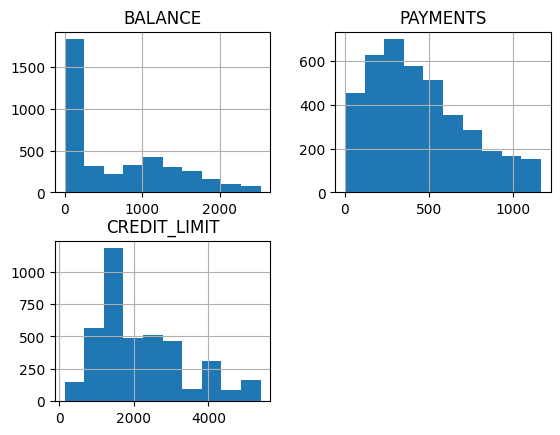

In [ ]:
df_cluster[['BALANCE', 'PAYMENTS', 'CREDIT_LIMIT']].hist()

In [ ]:
df_cluster.dropna(axis=1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,0.00,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,0.00,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,0.00,12
10,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,0.00,12
11,630.794744,0.818182,1492.18,1492.18,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,2000.0,705.618627,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,0.50,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.00,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,0.25,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,0.25,6


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4018 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4018 non-null   float64
 1   BALANCE_FREQUENCY                 4018 non-null   float64
 2   PURCHASES                         4018 non-null   float64
 3   ONEOFF_PURCHASES                  4018 non-null   float64
 4   INSTALLMENTS_PURCHASES            4018 non-null   float64
 5   CASH_ADVANCE                      4018 non-null   float64
 6   PURCHASES_FREQUENCY               4018 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4018 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4018 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4018 non-null   float64
 10  CASH_ADVANCE_TRX                  4018 non-null   int64  
 11  PURCHASES_TRX                     4018 non-null   int64  
 12  CREDIT

In [ ]:
df_cluster.BALANCE.unique()

array([  40.900749,  817.714335, 1823.652743, ...,   23.398673,
         13.457564,  372.708075])

In [ ]:
df_cluster.PAYMENTS.unique()

array([201.802084, 678.334763, 679.065082, ...,  81.270775,  52.549959,
        63.165404])

In [ ]:
df_cluster.CREDIT_LIMIT.unique()

array([1000.      , 1200.      , 2300.      , 2000.      , 3000.      ,
       2500.      , 1700.      , 1800.      , 1500.      , 2400.      ,
       4000.      , 3500.      , 1600.      , 2250.      , 5000.      ,
       4500.      , 5300.      ,  900.      , 2700.      , 1400.      ,
       1950.      , 2100.      , 3200.      , 4800.      , 3150.      ,
       2750.      , 3300.      , 1750.      , 2800.      , 2600.      ,
       3350.      , 2900.      ,  750.      , 2720.      ,  300.      ,
       3750.      , 1900.      ,  500.      , 4350.      , 3100.      ,
        200.      , 1300.      ,  600.      , 4200.      , 2200.      ,
        150.      , 1350.      , 3600.      , 4250.      , 3800.      ,
       5100.      , 4600.      , 1850.      , 3400.      , 5400.      ,
       4300.      , 5200.      , 4700.      , 2150.      , 4750.      ,
        400.      , 3700.      , 4400.      ,  700.      , 1100.      ,
       2550.      , 3050.      , 1550.      ,  800.      , 2950.

In [ ]:
min_max_scaler = MinMaxScaler()
min_max_scal = min_max_scaler.fit_transform(df_cluster[['BALANCE','PAYMENTS']])
df_cluster[['BALANCE','PAYMENTS']] = min_max_scal

In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

'\nЗдесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.\n'

In [ ]:
# your_code here
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

In [ ]:
calinsk_score = []
sillhouette_score = []
davies_score = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=42)
    kmeans.fit(df_cluster)
    calinsk_score.append(calinski_harabasz_score(df_cluster,kmeans.labels_))
    sillhouette_score.append(silhouette_score(df_cluster,kmeans.labels_))
    davies_score.append(davies_bouldin_score(df_cluster,kmeans.labels_))

Число кластеров calinski_harabasz_score - 8 c баллом 3116.115903364569
Число кластеров silhouette_score - 2 c баллом 0.5559382570350316
Число кластеров davies_bouldin_score - 7 c баллом 0.8728392192847698


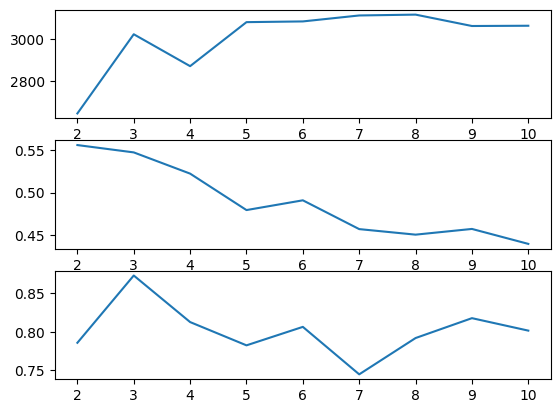

In [ ]:
print(f"Число кластеров calinski_harabasz_score - {calinsk_score.index(max(calinsk_score))+2} c баллом {max(calinsk_score)}")
print(f"Число кластеров silhouette_score - {sillhouette_score.index(max(sillhouette_score))+2} c баллом {max(sillhouette_score)}")
print(f"Число кластеров davies_bouldin_score - {davies_score.index(min(davies_score))+2} c баллом {max(davies_score)}")
fig, axs = plt.subplots(nrows= 3 , ncols= 1 )
axs[0].plot(range(2, 11), calinsk_score)
axs[1].plot(range(2, 11), sillhouette_score)
axs[2].plot(range(2, 11), davies_score)

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров k-means\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

In [ ]:
# your_code here
import numpy as np

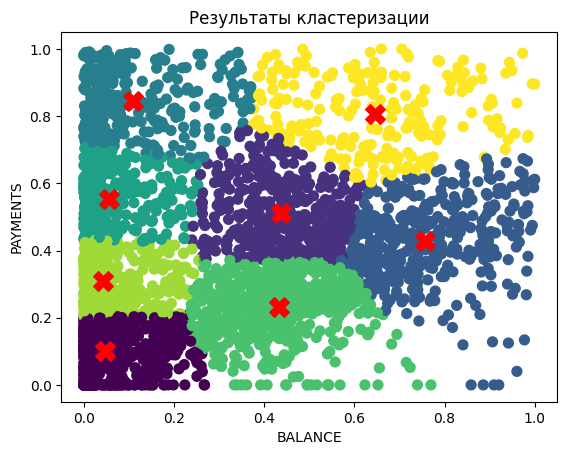

In [ ]:
kmeans = KMeans(n_clusters= 8,n_init = 10,random_state = 42)
kmeans.fit(min_max_scal)


cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
plt.scatter(df_cluster['BALANCE'], df_cluster['PAYMENTS'], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.title('Результаты кластеризации')
plt.show()

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

'\nЗдесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?\n'

In [ ]:
# your_code here
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

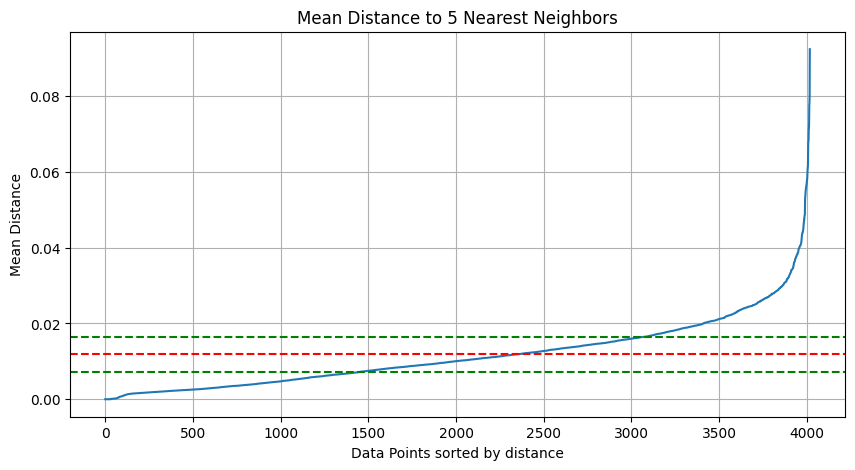

Оптимальный EPS = 0.011812992011176148


In [ ]:
# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(min_max_scal):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1- v2) for j, v2 in enumerate(min_max_scal) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров DBSCAN\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

In [ ]:
# your_code here
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

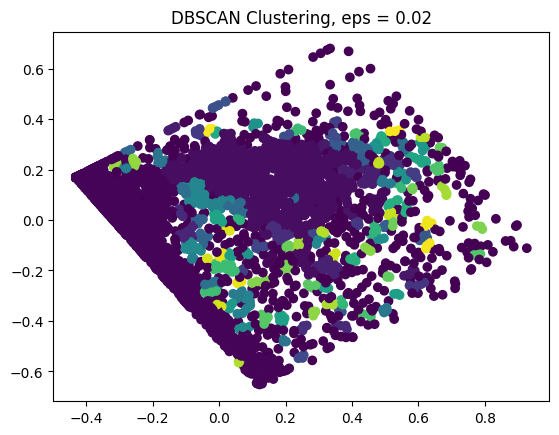

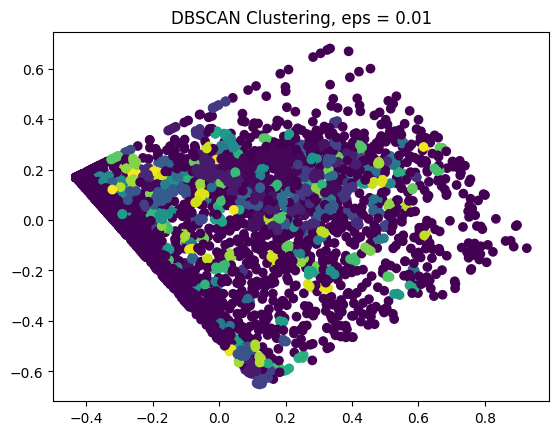

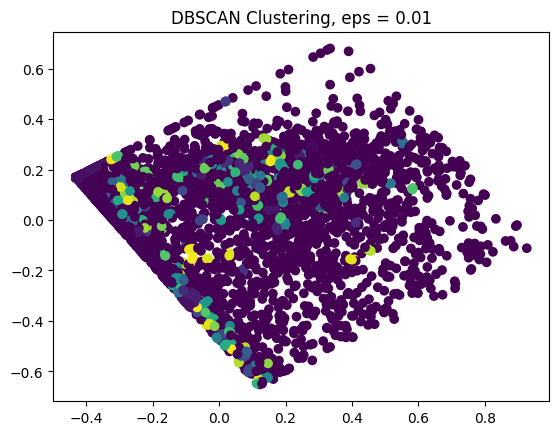

In [ ]:
# Создаем объект PCA и снижаем размерность до 2 компонент, чтобы визуализировать на двумерном графике
pca = PCA(n_components=2)
data_pca = pca.fit_transform(min_max_scal)

for eps in [np.mean(neighbours) + np.std(neighbours) / 2, np.mean(neighbours), np.mean(neighbours) - np.std(neighbours) / 2]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(min_max_scal)
  labels = dbscan.labels_

  # Визуализация результатов, темные точки - выбросы
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

[0]


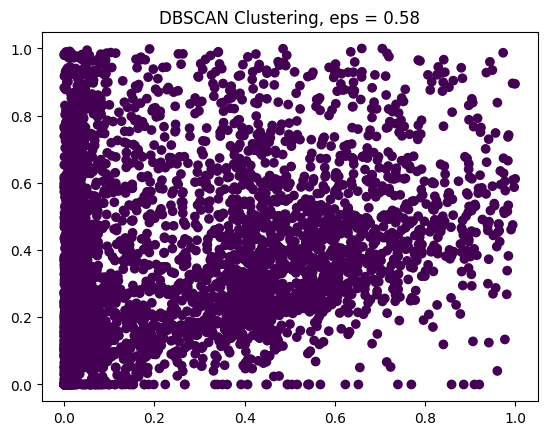

[0]


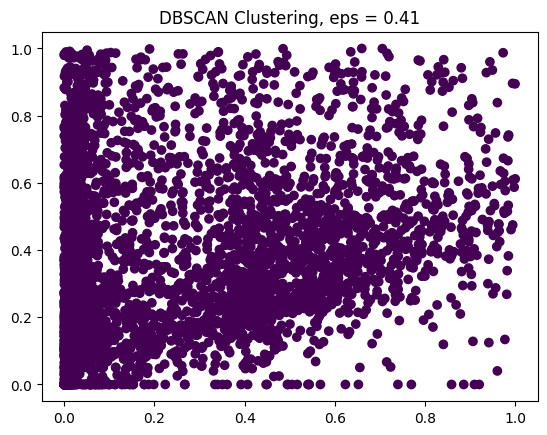

[0]


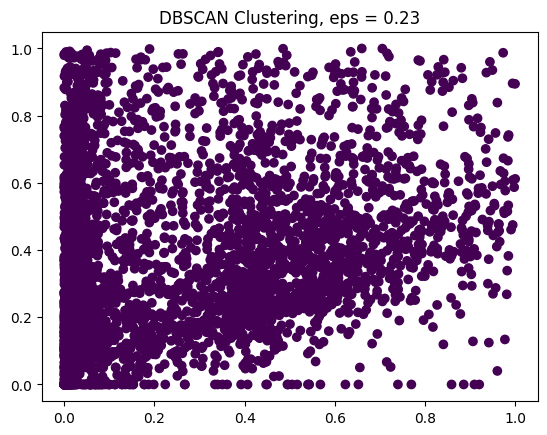

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]


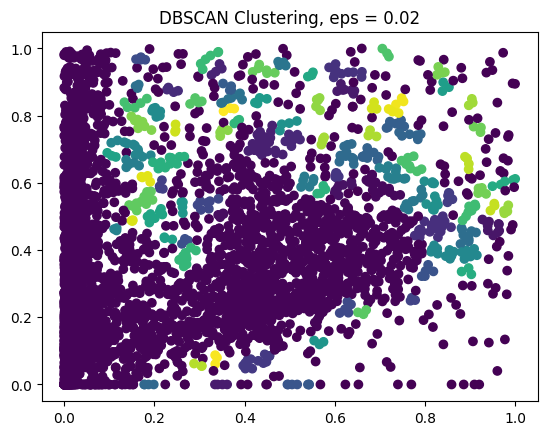

In [ ]:
for eps in [0.58,0.41,0.23,0.02]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(min_max_scal)
  labels_db = dbscan.labels_
  print(np.unique(labels_db))
  # Визуализация результатов, темные точки - выбросы
  plt.scatter(df_cluster['BALANCE'], df_cluster['PAYMENTS'], c=labels_db, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

In [ ]:

"""
Здесь иерархическая кластеризация и метрики
"""

'\nЗдесь иерархическая кластеризация и метрики\n'

In [ ]:
# your_code here
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [ ]:
score_1 = []
score_2 = []
score_3 = []
for k in range(2,11):
  cluster_model = AgglomerativeClustering(n_clusters=k,linkage='average')

  clusters = cluster_model.fit(min_max_scal)

  score_2.append(silhouette_score(min_max_scal,kmeans.labels_,metric='euclidean'))
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")

Оптимальное число кластеров Silhouette Score 2, с баллом 0.40696022278905486


In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров иерархической кластеризации\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

In [ ]:
# your_code here

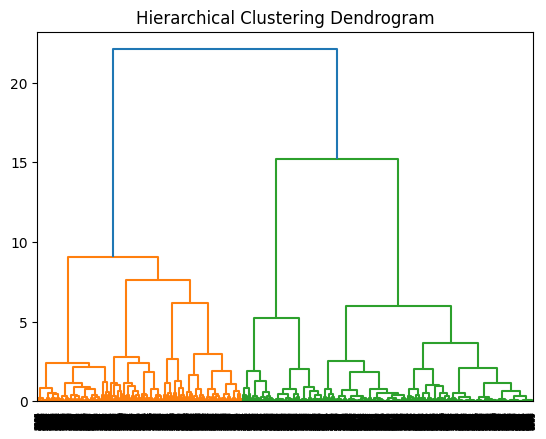

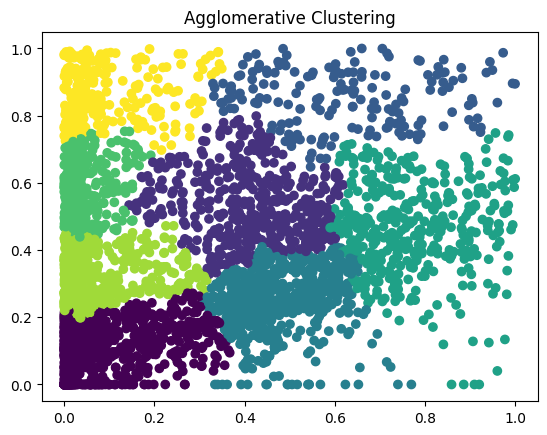

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=8)
agg_clustering.fit(min_max_scal)
linkage_matrix = hierarchy.linkage(min_max_scal, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
# Визуализация результатов кластеризации
plt.scatter(df_cluster['BALANCE'], df_cluster['PAYMENTS'], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [ ]:
!pip install ydata-profiling

In [ ]:
!pip install cast_control==0.10.11

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here

In [ ]:
# your_code here
df_cluster['kmeans_cluster'] = cluster_labels
df_cluster['dbsscan_cluster'] = labels
df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans_cluster,dbsscan_cluster
0,0.016159,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,0.161905,0.173287,0.00,12,0,0
4,0.323060,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,0.200000,0.582485,0.00,12,1,-1
7,0.720483,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,0.409524,0.583112,0.00,12,2,-1
10,0.510884,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,0.200000,0.930229,0.00,12,7,-1
11,0.249212,0.818182,1492.18,1492.18,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,0.352381,0.605914,0.00,12,4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.011257,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,0.161905,0.279588,0.50,6,6,0
8946,0.007579,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,0.161905,0.236882,0.00,6,6,0
8947,0.009244,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,0.161905,0.069787,0.25,6,0,0
8948,0.005317,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,0.066667,0.045125,0.25,6,0,0


In [ ]:
df_cluster['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, -1)


In [ ]:
df_db_0 = df_cluster[df_cluster.dbscan_cluster == 0]
df_db_1 = df_cluster[df_cluster.dbscan_cluster == 1]
df_db_2 = df_cluster[df_cluster.dbscan_cluster == 2]
df_db_3 = df_cluster[df_cluster.dbscan_cluster == 3]
df_db_4 = df_cluster[df_cluster.dbscan_cluster == 4]
df_db_5 = df_cluster[df_cluster.dbscan_cluster == 5]
df_db_6 = df_cluster[df_cluster.dbscan_cluster == 6]
df_db_7 = df_cluster[df_cluster.dbscan_cluster == 7]

df_kmeans_0 = df[df.kmeans_cluster == 0]
df_kmeans_1 = df[df.kmeans_cluster == 1]
df_kmeans_2 = df[df.kmeans_cluster == 2]
df_kmeans_3 = df[df.kmeans_cluster == 3]

AttributeError: ignored